Link: https://datasets.cellxgene.cziscience.com/bc4614b7-5ab2-4f30-8e8b-eaeeb840c154.h5ad

In [1]:
import numpy as np

In [ ]:
import scanpy as sc

# Load the .h5ad file
adata = sc.read_h5ad("datasets/bc4614b7-5ab2-4f30-8e8b-eaeeb840c154.h5ad")

In [4]:
print(adata.X)

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 67489064 stored elements and shape (51367, 35477)>
  Coords	Values
  (0, 5)	0.6931471824645996
  (0, 29)	0.6931471824645996
  (0, 41)	0.6931471824645996
  (0, 46)	0.6931471824645996
  (0, 55)	0.6931471824645996
  (0, 57)	0.6931471824645996
  (0, 59)	0.6931471824645996
  (0, 70)	0.6931471824645996
  (0, 79)	0.6931471824645996
  (0, 82)	0.6931471824645996
  (0, 83)	0.6931471824645996
  (0, 96)	0.6931471824645996
  (0, 131)	0.6931471824645996
  (0, 133)	0.6931471824645996
  (0, 142)	0.6931471824645996
  (0, 200)	0.6931471824645996
  (0, 212)	1.6094379425048828
  (0, 242)	1.0986123085021973
  (0, 243)	0.6931471824645996
  (0, 246)	0.6931471824645996
  (0, 254)	0.6931471824645996
  (0, 262)	0.6931471824645996
  (0, 280)	0.6931471824645996
  (0, 292)	0.6931471824645996
  (0, 331)	1.0986123085021973
  :	:
  (51366, 34754)	1.6094379425048828
  (51366, 34755)	0.6931471824645996
  (51366, 34772)	0.6931471824645996
  (51366, 34790)	0.6

In [9]:
adata.shape

(51367, 35477)

In [10]:
# Check the number of non-zero entries for the first 10 cells
for i in range(0,10):
    a = adata.X[i].toarray().flatten()
    count = 0
    for l in a:
        if l != 0.0:
            count += 1
    print(count)

2514
785
733
2013
1681
1400
630
1747
1771
526


In [11]:
# Check the name of the genes that are expressed
a = adata.X[0].toarray().flatten()

expressed = np.where(a > 0.0)[0]
adata.var_names[expressed]

Index(['ENSG00000241860', 'ENSG00000188157', 'ENSG00000078808',
       'ENSG00000230415', 'ENSG00000162576', 'ENSG00000221978',
       'ENSG00000242485', 'ENSG00000160075', 'ENSG00000189339',
       'ENSG00000008130',
       ...
       'ENSG00000129682', 'ENSG00000269556', 'ENSG00000235703',
       'ENSG00000102287', 'ENSG00000180879', 'ENSG00000102032',
       'ENSG00000160219', 'ENSG00000130826', 'ENSG00000198899',
       'ENSG00000198727'],
      dtype='object', length=2514)

In [12]:
# In scRNA-seq the data matrix is always very sparse
# since a single cell usually expresses a small subsets of all the genes
# so the number of non-zero entries in the matrix is << (samples x genes) dimension
n_samples, n_genes = adata.X.shape
dim = n_samples * n_genes
print(dim)
print(adata.X)

1822347059
<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 67489064 stored elements and shape (51367, 35477)>
  Coords	Values
  (0, 5)	0.6931471824645996
  (0, 29)	0.6931471824645996
  (0, 41)	0.6931471824645996
  (0, 46)	0.6931471824645996
  (0, 55)	0.6931471824645996
  (0, 57)	0.6931471824645996
  (0, 59)	0.6931471824645996
  (0, 70)	0.6931471824645996
  (0, 79)	0.6931471824645996
  (0, 82)	0.6931471824645996
  (0, 83)	0.6931471824645996
  (0, 96)	0.6931471824645996
  (0, 131)	0.6931471824645996
  (0, 133)	0.6931471824645996
  (0, 142)	0.6931471824645996
  (0, 200)	0.6931471824645996
  (0, 212)	1.6094379425048828
  (0, 242)	1.0986123085021973
  (0, 243)	0.6931471824645996
  (0, 246)	0.6931471824645996
  (0, 254)	0.6931471824645996
  (0, 262)	0.6931471824645996
  (0, 280)	0.6931471824645996
  (0, 292)	0.6931471824645996
  (0, 331)	1.0986123085021973
  :	:
  (51366, 34754)	1.6094379425048828
  (51366, 34755)	0.6931471824645996
  (51366, 34772)	0.6931471824645996
  (51366,

In [13]:
# Cell level metadata (-> DataFrame)
adata.obs.head()

,mapped_reference_annotation,donor_id,donor_age,self_reported_ethnicity_ontology_term_id,donor_living_at_sample_collection,donor_menopausal_status,donor_times_pregnant,sample_uuid,sample_preservation_method,tissue_ontology_term_id,...,seurat_subcluster_3,seurat_subcluster_9,cell_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
AAACAGCCAATTGAAG-1_1,GENCODE 32,"pooled [K107913,K107878,K107919,K107524,K107539]","pooled [55 years,59 years,67 years,65 years,52...",HANCESTRO:0590,True,postmenopausal,"pooled [1,1,3,0,1]","pooled [037d5417-47a3-4ef9-aebb-0295baafc479,a...",cryopreservation,UBERON:0035328,...,1,1,luminal adaptive secretory precursor cell of m...,10x multiome,normal,female,upper outer quadrant of breast,European American,adult stage,tV2|5!dr~b
AAACCAACACCCACCT-1_1,GENCODE 32,"pooled [K107913,K107878,K107919,K107524,K107539]","pooled [55 years,59 years,67 years,65 years,52...",HANCESTRO:0590,True,postmenopausal,"pooled [1,1,3,0,1]","pooled [037d5417-47a3-4ef9-aebb-0295baafc479,a...",cryopreservation,UBERON:0035328,...,14,14,adipocyte,10x multiome,normal,female,upper outer quadrant of breast,European American,adult stage,_o5T#31aRo
AAACCAACAGCAAATA-1_1,GENCODE 32,"pooled [K107913,K107878,K107919,K107524,K107539]","pooled [55 years,59 years,67 years,65 years,52...",HANCESTRO:0590,True,postmenopausal,"pooled [1,1,3,0,1]","pooled [037d5417-47a3-4ef9-aebb-0295baafc479,a...",cryopreservation,UBERON:0035328,...,4,4,fibroblast,10x multiome,normal,female,upper outer quadrant of breast,European American,adult stage,eyhbhMoG=W
AAACCAACATTAGCCA-1_1,GENCODE 32,"pooled [K107913,K107878,K107919,K107524,K107539]","pooled [55 years,59 years,67 years,65 years,52...",HANCESTRO:0590,True,postmenopausal,"pooled [1,1,3,0,1]","pooled [037d5417-47a3-4ef9-aebb-0295baafc479,a...",cryopreservation,UBERON:0035328,...,5,5,fibroblast,10x multiome,normal,female,upper outer quadrant of breast,European American,adult stage,326na1z8}K
AAACCGAAGACTTACA-1_1,GENCODE 32,"pooled [K107913,K107878,K107919,K107524,K107539]","pooled [55 years,59 years,67 years,65 years,52...",HANCESTRO:0590,True,postmenopausal,"pooled [1,1,3,0,1]","pooled [037d5417-47a3-4ef9-aebb-0295baafc479,a...",cryopreservation,UBERON:0035328,...,1,1,luminal adaptive secretory precursor cell of m...,10x multiome,normal,female,upper outer quadrant of breast,European American,adult stage,7*<#kR=v&%


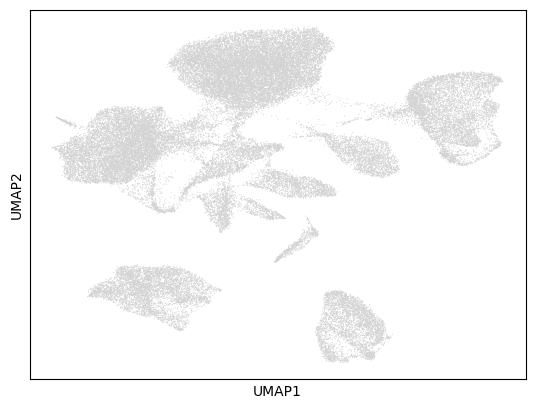

In [15]:
# Neighborhood graph, UMAP/t-SNE
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)
sc.tl.umap(adata)
sc.pl.umap(adata)

In [16]:
adata.varm['PCs']

KeyError: 'PCs'

In [20]:
print("varm:", list(adata.varm.keys()))
print("obsm:", list(adata.obsm.keys()))
print("uns :", list(adata.uns.keys()))

varm: []
obsm: ['X_lsi', 'X_pca', 'X_umap.atac', 'X_umap.rna', 'X_wnn.umap', 'X_umap']
uns : ['citation', 'default_embedding', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title', 'neighbors', 'umap']
